# Tugas Kecil 1 IF3270 Pembelajaran Mesin

Anggota:
- Muhammad Tito Prakasa (13519007)
- Rayhan Alghifari Fauzta (13519039) 

## Import Library dan Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz, export_text
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Dataset Breast Cancer

## Preprocess Train dan Test Data

In [2]:
#load data
breast_cancer = load_breast_cancer()
X_bc, y_bc = load_breast_cancer(return_X_y=True)

#splitting train and test data
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=0)

## Train dan Predict Data - Decision Tree

Accuracy Score:
Tanpa Parameter:		0.9122807017543859
Dengan Parameter Max Depth:	0.9649122807017544

F1 Score:
Tanpa Parameter:		0.923076923076923
Dengan Parameter Max Depth:	0.9705882352941176

Tree Model Tanpa Parameter:
|--- worst concave points <= 0.14
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 107.75
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- mean concavity <= 0.14
|   |   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |   |--- mean texture <= 19.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- mean texture >  19.90
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |   |--- worst texture <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst textur

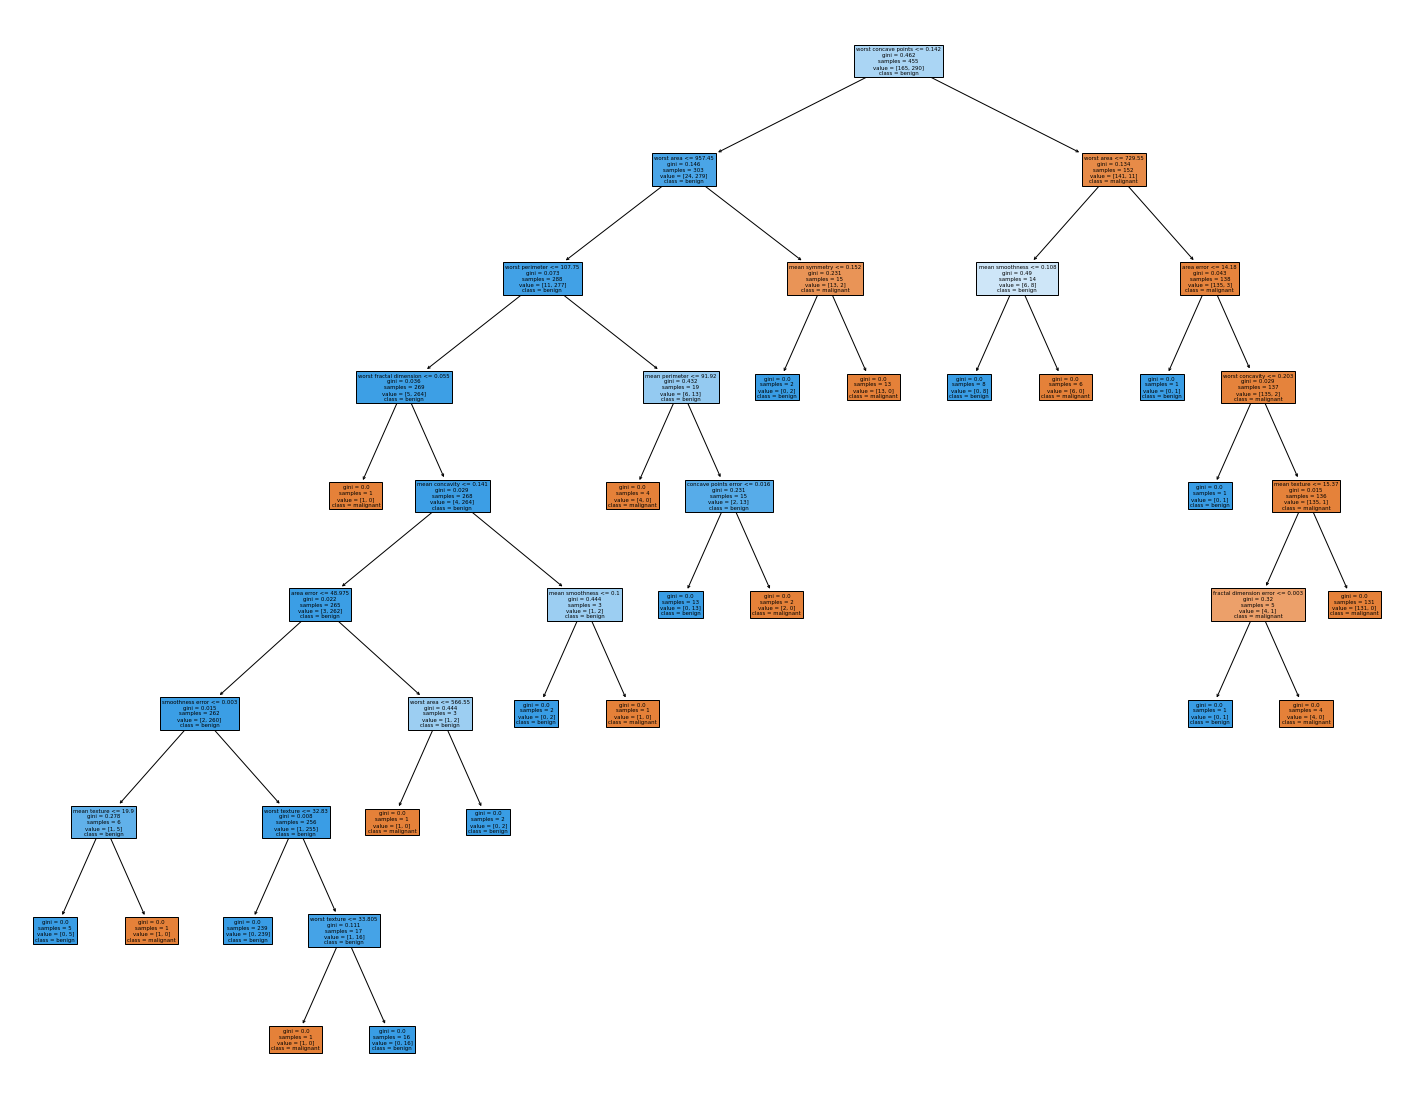

In [3]:
#train data tanpa param tambahan
clf_dt = tree.DecisionTreeClassifier(random_state=0)
clf_dt_train = clf_dt.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_dt_param = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf_dt_param_train = clf_dt_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_dt_test = clf_dt_train.predict(X_bc_test)
clf_dt_param_test = clf_dt_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_dt_test)))
print("Dengan Parameter Max Depth:\t" + str(accuracy_score(y_bc_test, clf_dt_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_dt_test)))
print("Dengan Parameter Max Depth:\t" + str(f1_score(y_bc_test, clf_dt_param_test)))

print()

print("Tree Model Tanpa Parameter:")

#Modelling
model = tree.export_text(clf_dt_train, feature_names=list(breast_cancer.feature_names))
print(model)

#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt_train, 
                   feature_names=list(breast_cancer.feature_names),  
                   class_names=list(breast_cancer.target_names),
                   filled=True)

## Pembahasan - Decision Tree

Dari hasil percobaan di atas dapat terlihat bahwa penggunaan algoritma Decision Tree cukup baik untuk memprediksi penentuan breast cancer atau tidaknya seseorang. Akurasi yang dicapai berkisar 91-96%, dimana angka ini termasuk cukup tinggi. Namun yang perlu diperhatikan adalah adanya perbedaan nilai antara model decision tree yang didefinisikan max_depth-nya dengan yang tidak. Perbedaannya pun cukup jauh yaitu sekitar 5% (model yang memiliki parameter 96% sedangkan yang tidak hanya 91%). 

Hipotesa kami, hal ini dikarenakan ketika suatu decision tree tidak definisikan max_depth-nya maka secara otomatis ia akan membuat depth sedalam mungkin berdasarkan hasil di tiap iterasi yang ia lakukan. Berbeda dengan jika max_depth-nya sudah ditentukan ia akan berhenti iterasi ketika max_depth-nya tercapai. Hal ini berpengatuh ketika dilakukan testing karena data testing kita tidak tahu sevariasi apa sehingga depth yang dalam hanya membuat "syarat" yang ketat untuk sebuah kasus untuk diklasifikasikan ke kelas apa. Berbeda dengan depth yang tidak terlalu dalam membuat sebuah kasus lebih bebas untuk diklasifikasikan ke kelas apa. Peristiwa ini sering disebut dengan "overfit" atau model tree yang dibuat terlalu benar untuk training data namun tidak cukup benar untuk test data.

## Train dan Predict Data - ID3Estimator

In [4]:
#train data tanpa param tambahan
clf_id3 = Id3Estimator()
clf_id3_train = clf_id3.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_id3_param = Id3Estimator(gain_ratio=True)
clf_id3_param_train = clf_id3_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_id3_test = clf_id3_train.predict(X_bc_test)
clf_id3_param_test = clf_id3_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_id3_test)))
print("Dengan Parameter Gain Ratio:\t" + str(accuracy_score(y_bc_test, clf_id3_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_id3_test)))
print("Dengan Parameter Gain Ratio:\t" + str(f1_score(y_bc_test, clf_id3_param_test)))

print()

print("Tree Model Tanpa Parameter:")

#Modelling
model = export_text(clf_id3_train.tree_, breast_cancer.feature_names)
print(model)

Accuracy Score:
Tanpa Parameter:		0.9122807017543859
Dengan Parameter Gain Ratio:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9242424242424243
Dengan Parameter Gain Ratio:	0.9618320610687023

Tree Model Tanpa Parameter:

worst concave points <=0.14
|   worst perimeter <=107.75
|   |   symmetry error <=0.02
|   |   |   radius error <=0.55
|   |   |   |   worst texture <=29.76: 1 (64) 
|   |   |   |   worst texture >29.76
|   |   |   |   |   mean texture <=23.24
|   |   |   |   |   |   mean radius <=12.51: 1 (2) 
|   |   |   |   |   |   mean radius >12.51
|   |   |   |   |   |   |   worst fractal dimension <=0.07: 1 (1) 
|   |   |   |   |   |   |   worst fractal dimension >0.07: 0 (3) 
|   |   |   |   |   mean texture >23.24: 1 (8) 
|   |   |   radius error >0.55: 0 (2) 
|   |   symmetry error >0.02: 1 (189) 
|   worst perimeter >107.75
|   |   worst texture <=20.22: 1 (11) 
|   |   worst texture >20.22
|   |   |   mean symmetry <=0.15: 1 (3) 
|   |   |   mean symmetry >0.15
|   |  

## Pembahasan - ID3Estimator

Sama seperti sebelumnya, algoritma ID3Estimator untuk prediksi di kasus breast cancer ini bekerja cukup baik dengan akurasi sekitar 91-96%. Namun lagi-lagi dengan menambahkan parameter terdapat peningkatan akurasi sekitar 4-5%. Parameter yang ditambahkan adalah penggunaan gain ratio ketika penentuan percabangan. Seperti yang kita ketahui algoritma ID3Estimator ini menggunakan information gain untuk menentukan percabangannya, hanya saja information gain ini terdapat kekurangan ketika menemukan properties yang memiliki sparse value tinggi, seperti tanggal, nama, dll. Nah gain ratio hadir untuk menjawab kekurangan tersebut sehingga hasil perhitungan ID3Estimator pun menjadi lebih tepat. Alasan itu mengapa akurasinya bertambah ketika menggunakan gain ratio dalam modelling treenya.

## Train dan Predict Data - K Means

Accuracy Score:
Tanpa Parameter:		0.8157894736842105
Dengan Parameter init:		0.8157894736842105

F1 Score:
Tanpa Parameter:		0.8645161290322582
Dengan Parameter init:		0.8645161290322582



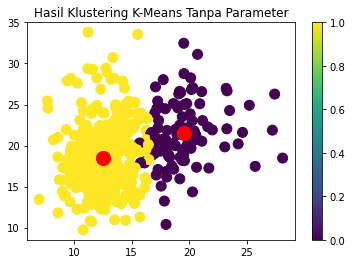

In [5]:
#train data tanpa param tambahan
clf_km = KMeans(n_clusters=2, random_state=42)
clf_km_train = clf_km.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_km_param = KMeans(n_clusters=2, init="random", random_state=42)
clf_km_param_train = clf_km_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_km_test = clf_km_train.predict(X_bc_test)
clf_km_param_test = clf_km_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_km_test)))
print("Dengan Parameter init:\t\t" + str(accuracy_score(y_bc_test, clf_km_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_km_test)))
print("Dengan Parameter init:\t\t" + str(f1_score(y_bc_test, clf_km_param_test)))

print()

#Modelling
output = plt.scatter(X_bc_train[:,0], X_bc_train[:,1], s = 100, c = clf_km.labels_, marker = 'o', alpha = 1, )
centers = clf_km_train.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title("Hasil Klustering K-Means Tanpa Parameter")
plt.colorbar (output)
plt.show()

## Pembahasan - K Means

Dari hasil yang sudah ditampilkan dapat kita cermati bahwa sepertinya algoritma K-Means untuk prediksi kasus breast cancer bekerja tidak semaksimal algoritma-algoritma sebelumnya, dapat diperhatikan bahwa akurasinya hanya menyentuh angka 81%. Penambahan parameter pun tidak merubah hasilnya, walaupun sebenarnya hal ini masih menjadi pertanyaan kami karena menurut dokumentasinya, default untuk parameter init adalah "k-means++" tetapi ketika diubah menjadi "random" tidak ada perubahan sedikitpun. Parameter init berfungsi untuk menentukan inisiasi centroid ketika melakukan clustering.

## Train dan Predict Data - Logistic Regression

In [6]:
#train data tanpa param tambahan
clf_lr = LogisticRegression(random_state=0, max_iter=10000)
clf_lr_train = clf_lr.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_lr_param = LogisticRegression(solver='liblinear', random_state=0, max_iter=10000)
clf_lr_param_train = clf_lr_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_lr_test = clf_lr_train.predict(X_bc_test)
clf_lr_param_test = clf_lr_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_lr_test)))
print("Dengan Parameter Solver:\t" + str(accuracy_score(y_bc_test, clf_lr_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_lr_test)))
print("Dengan Parameter Solver:\t" + str(f1_score(y_bc_test, clf_lr_param_test)))

print()

#coefficient
print("Koefisien tanpa Param:")
print(clf_lr_train.coef_)
print()
print("Koefisien dengan Param:")
print(clf_lr_param.coef_)

Accuracy Score:
Tanpa Parameter:		0.9473684210526315
Dengan Parameter Solver:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9538461538461538
Dengan Parameter Solver:	0.9618320610687023

Koefisien tanpa Param:
[[ 0.70413815  0.18923387 -0.18518668  0.02255821 -0.15224482 -0.18579956
  -0.3740991  -0.22118392 -0.28542832 -0.02784347 -0.04559648  1.00901504
   0.01078768 -0.10929324 -0.01293174  0.06561866 -0.00560041 -0.02343517
  -0.02950298  0.0163384   0.25581119 -0.41292612 -0.20571203 -0.01052594
  -0.2705023  -0.64725327 -1.21640726 -0.47654054 -0.64579825 -0.09177904]]

Koefisien dengan Param:
[[ 1.83704441  0.09774271  0.05263436 -0.00539142 -0.12503262 -0.36728254
  -0.5277526  -0.26735875 -0.23769814 -0.02550989  0.02603972  0.99373096
   0.13647315 -0.10813138 -0.00725612 -0.01194538 -0.04626444 -0.02855526
  -0.03460775  0.00549043  1.46290459 -0.3034338  -0.22841508 -0.02194313
  -0.21334434 -1.16242114 -1.55057159 -0.54221243 -0.62215841 -0.12422661]]


## Pembahasan - Logistic Regression

Algoritma kali ini bekerja dengan cukup baik dengan akurasi mencapai 94-95%. Dapat diperhatikan bahwa perbedaan parameter solver ternyata memberikan hasil akurasi yang berbeda. Peningkatan kecil itu didapatkan ketika menggunakan solver "liblinear", hal ini dikarenakan solver default untuk algoritma ini adalah "lbfgs" dan solver tersebut ternyata baik digunakan untuk multiclass problem (me-refer dokumentasi LogisticRegression pada spek). Sedangkan "libliniear" baik digunakan untuk datasets yang ukurannya tidak terlalu besar. Hal-hal tersebut lah yang sepertinya mengakibatkan perbedaan hasil dan memberikan akurasi yang lebih tinggi untuk solver "libliniear".

## Train dan Predict Data - Neural Network

In [7]:
#train data tanpa param tambahan
clf_nn = MLPClassifier(random_state=0)
clf_nn_train = clf_nn.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_nn_param = MLPClassifier(solver="sgd", random_state=0)
clf_nn_param_train = clf_nn_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_nn_test = clf_nn_train.predict(X_bc_test)
clf_nn_param_test = clf_nn_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_nn_test)))
print("Dengan Parameter Solver:\t" + str(accuracy_score(y_bc_test, clf_nn_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_nn_test)))
print("Dengan Parameter Solver:\t" + str(f1_score(y_bc_test, clf_nn_param_test)))

print()

#coefficient
print("Koefisien tanpa Param:")
print(clf_nn_train.coefs_[:1])
print()
print("Koefisien dengan Param:")
print(clf_nn_param.coefs_[:1])

Accuracy Score:
Tanpa Parameter:		0.9473684210526315
Dengan Parameter Solver:	0.8771929824561403

F1 Score:
Tanpa Parameter:		0.9552238805970149
Dengan Parameter Solver:	0.8906250000000001

Koefisien tanpa Param:
[array([[ 5.37908435e-03,  1.07715879e-01,  3.79650952e-02, ...,
        -1.50841789e-01,  1.38772073e-01, -2.36870603e-02],
       [ 7.20680727e-02, -9.50465201e-02,  1.08885276e-01, ...,
        -6.32557559e-02, -1.90234038e-01,  1.93368292e-09],
       [-9.23727345e-02,  9.54377277e-02, -5.44002097e-02, ...,
         9.15196323e-02,  2.00340166e-01,  1.81676361e-02],
       ...,
       [-5.96882395e-02, -1.79199551e-02,  2.08533107e-01, ...,
         2.80730068e-02,  1.45823598e-01, -5.50718084e-10],
       [-1.03093680e-02, -1.14221925e-01, -1.60711194e-01, ...,
        -2.50063634e-02,  1.83755376e-01, -5.16577512e-05],
       [-1.80622738e-01, -6.00622937e-02,  1.75865753e-01, ...,
        -2.97395765e-02,  1.31848007e-01,  1.82677219e-04]])]

Koefisien dengan Param:
[ar

## Pembahasan - Neural Network

Dari hasil di atas algoritma neural network untuk prediksi kasus breast cancer bekerja cukup baik dengan akurasi 94%, walaupun turun jika ditambahkan parameter solver dengan nilai "sgd" atau stochastic gradient descent. Sebenarnya solver default yang digunakan algoritma ini, "adam", berbasis solver "sgd" juga, hanya saja solver "adam" telah dioptimisasi sehingga dalam melakukan weight optimization bekerja secara lebih akurat. Hal itu mengakibatkan tingkat akurasi yang lebih baik dibandingkan dengan "sgd" biasa.

## Train dan Predict Data - SVM

In [8]:
#train data tanpa param tambahan
clf_svm = SVC(random_state=0)
clf_svm_train = clf_svm.fit(X_bc_train, y_bc_train)

#train data dengan param tambahan
clf_svm_param = SVC(kernel='linear', random_state=0)
clf_svm_param_train = clf_svm_param.fit(X_bc_train, y_bc_train)

#predict Result
clf_svm_test = clf_svm_train.predict(X_bc_test)
clf_svm_param_test = clf_svm_param_train.predict(X_bc_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_bc_test, clf_svm_test)))
print("Dengan Parameter Kernel:\t" + str(accuracy_score(y_bc_test, clf_svm_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_bc_test, clf_svm_test)))
print("Dengan Parameter Kernel:\t" + str(f1_score(y_bc_test, clf_svm_param_test)))

print()

#coefficient
print("Koefisien dengan Param:")
print(clf_svm_param.coef_)

Accuracy Score:
Tanpa Parameter:		0.9298245614035088
Dengan Parameter Kernel:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9428571428571428
Dengan Parameter Kernel:	0.9618320610687023

Koefisien dengan Param:
[[ 0.54174545  0.03119995 -0.01841345  0.00309252 -0.22986108 -0.20187521
  -0.41230698 -0.27153825 -0.45281127 -0.02465204 -0.03693582  0.85348219
   0.19205172 -0.07662483 -0.01846723  0.09147283  0.00655153 -0.02917052
  -0.02611112  0.02591357  0.26488769 -0.1925217  -0.10451651 -0.00491063
  -0.36843782 -0.88084913 -1.75797051 -0.60591164 -0.89966949 -0.11176669]]


## Pembahasan - SVM

Dari hasil di atas dapat disimpulkan bahwa algoritma SVM bekerja cukup baik untuk kasus prediksi breast_cancer dengan akurasi 92-95%. Dapat diperhatikan bahwa penambahan parameter kernel dapat meningkatkan akurasi. Walaupun penulis code sendiri belum memahami secara penuh apa bedanya kernel yang default dengan yang "linear", hanya saja dari dokumentasi yang dibaca hal ini berpengaruh ke dalam pra komputasi kernel matrix ketika mengoperasikan data. Belum diketahui bagaimana pengaruh pengelolaan matriks pra komputasi dapat mempengaruhi kenaikan akurasi.

## Perbandingan Performa Breast Cancer - Tanpa Parameter

In [9]:
def show_summary(acc, f1):
    algo = ['DecisionTreeClassifier', 'Id3Estimator', 'K-Means', 'LogisticRegression', 'Neural_network', 'SVM']
    perf = {'Accuracy': acc, 'F1': f1}
    perf_tab = pd.DataFrame(data=perf, index=algo)
    return perf_tab

In [10]:
acc_bc = [accuracy_score(y_bc_test, clf_dt_test), accuracy_score(y_bc_test, clf_id3_test), 
          accuracy_score(y_bc_test, clf_km_test), accuracy_score(y_bc_test, clf_lr_test), 
          accuracy_score(y_bc_test, clf_nn_test), accuracy_score(y_bc_test, clf_svm_test)]

f1_bc = [f1_score(y_bc_test, clf_dt_test), f1_score(y_bc_test, clf_id3_test), 
         f1_score(y_bc_test, clf_km_test), f1_score(y_bc_test, clf_lr_test), 
         f1_score(y_bc_test, clf_nn_test), f1_score(y_bc_test, clf_svm_test)]

perf_bc = show_summary(acc_bc, f1_bc)
perf_bc

,Accuracy,F1
DecisionTreeClassifier,0.912281,0.923077
Id3Estimator,0.912281,0.924242
K-Means,0.815789,0.864516
LogisticRegression,0.947368,0.953846
Neural_network,0.947368,0.955224
SVM,0.929825,0.942857


## Perbandingan Performa Breast Cancer - Dengan Parameter

In [11]:
acc_bc_p = [accuracy_score(y_bc_test, clf_dt_param_test), accuracy_score(y_bc_test, clf_id3_param_test), 
            accuracy_score(y_bc_test, clf_km_param_test), accuracy_score(y_bc_test, clf_lr_param_test), 
            accuracy_score(y_bc_test, clf_nn_param_test), accuracy_score(y_bc_test, clf_svm_param_test)]

f1_bc_p = [f1_score(y_bc_test, clf_dt_param_test), f1_score(y_bc_test, clf_id3_param_test), 
           f1_score(y_bc_test, clf_km_param_test), f1_score(y_bc_test, clf_lr_param_test), 
           f1_score(y_bc_test, clf_nn_param_test), f1_score(y_bc_test, clf_svm_param_test)]

perf_bc_p = show_summary(acc_bc_p, f1_bc_p)
perf_bc_p

,Accuracy,F1
DecisionTreeClassifier,0.964912,0.970588
Id3Estimator,0.956140,0.961832
K-Means,0.815789,0.864516
LogisticRegression,0.956140,0.961832
Neural_network,0.877193,0.890625
SVM,0.956140,0.961832


# Dataset Play Tennis

## Preprocess Train dan Test Data

In [12]:
df = pd.read_csv('PlayTennis.csv')

# Get attribute and class name
col_name = df.columns.tolist()
feat_name = col_name[:-1]
class_name = col_name[-1]

# Label encoding
le = LabelEncoder()
df = df.apply(le.fit_transform)

# Split train and test data
X_pt = df[feat_name]
y_pt = df[[class_name]]
X_pt_train, X_pt_test, y_pt_train, y_pt_test = train_test_split(X_pt, y_pt, test_size=0.2, random_state=0)

## Train dan Predict Data - Decision Tree

Accuracy Score:
Tanpa Parameter:		0.3333333333333333
Dengan Parameter Max Depth:	0.3333333333333333

F1 Score:
Tanpa Parameter:		0.5
Dengan Parameter Max Depth:	0.5

Tree Model Tanpa Parameter:
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 0
|   |--- Temperature >  1.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- Wind <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Wind >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1



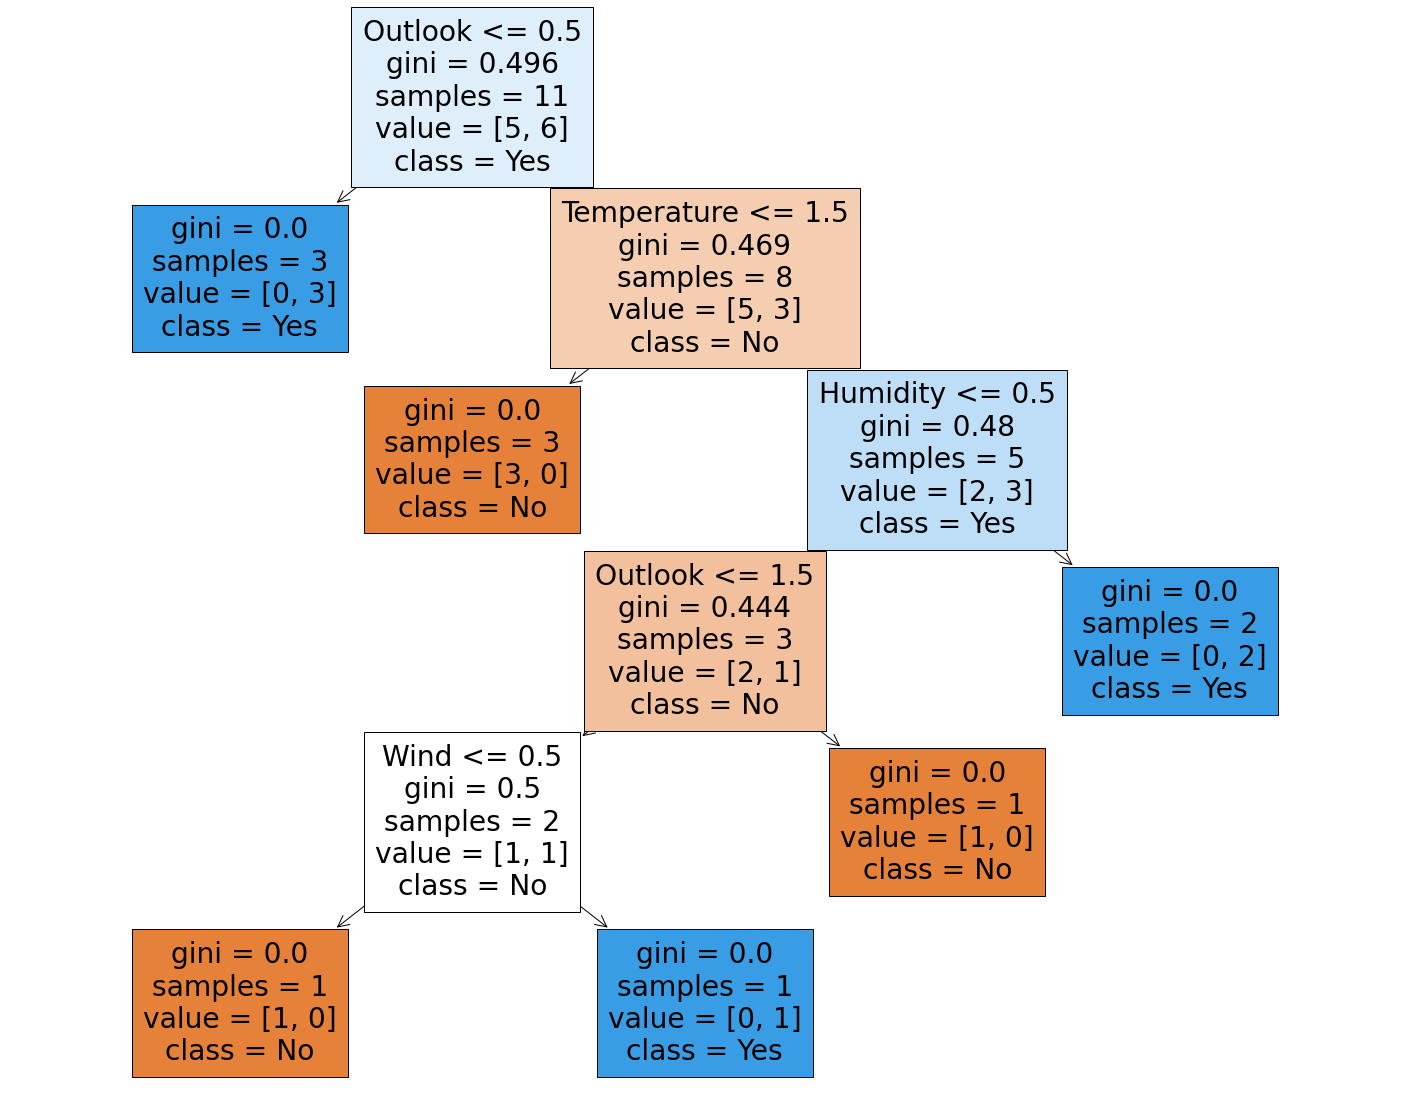

In [13]:
#train data tanpa param tambahan
clf_dt = tree.DecisionTreeClassifier(random_state=0)
clf_dt_train = clf_dt.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_dt_param = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf_dt_param_train = clf_dt_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_dt_test = clf_dt_train.predict(X_pt_test)
clf_dt_param_test = clf_dt_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_dt_test)))
print("Dengan Parameter Max Depth:\t" + str(accuracy_score(y_pt_test, clf_dt_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_dt_test)))
print("Dengan Parameter Max Depth:\t" + str(f1_score(y_pt_test, clf_dt_param_test)))

print()

print("Tree Model Tanpa Parameter:")

#Modelling
model = tree.export_text(clf_dt_train, feature_names=feat_name)
print(model)

#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names=feat_name,  
                   class_names=["No", "Yes"],
                   filled=True)

## Pembahasan - Decision Tree

Dari hasil percobaan di atas terlihat bahwa penggunaan algoritma Decision Tree kurang baik dalam menentukan keputusan untuk bermain tenis atau tidak. Akurasi yang didapat hanya berkisar di angka 0.33 untuk model tanpa parameter tambahan dan 0.5 untuk model dengan parameter tambahan. Hasil yang sama juga didapat untuk skor F1. Meskipun begitu, pola hasil ini serupa dengan percobaan pada dataset breast cancer sebelumnya yaitu model dengan parameter max_depth meraih nilai yang lebih tinggi.

## Train dan Predict Data - ID3Estimator

In [14]:
#train data tanpa param tambahan
clf_id3 = Id3Estimator()
clf_id3_train = clf_id3.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_id3_param = Id3Estimator(gain_ratio=True)
clf_id3_param_train = clf_id3_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_id3_test = clf_id3_train.predict(X_pt_test)
clf_id3_param_test = clf_id3_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_id3_test)))
print("Dengan Parameter Gain Ratio:\t" + str(accuracy_score(y_pt_test, clf_id3_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_id3_test)))
print("Dengan Parameter Gain Ratio:\t" + str(f1_score(y_pt_test, clf_id3_param_test)))

print()

print("Tree Model Tanpa Parameter:")

#Modelling
model = export_text(clf_id3_train.tree_, feat_name)
print(model)

Accuracy Score:
Tanpa Parameter:		0.3333333333333333
Dengan Parameter Gain Ratio:	0.3333333333333333

F1 Score:
Tanpa Parameter:		0.5
Dengan Parameter Gain Ratio:	0.5

Tree Model Tanpa Parameter:

Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Temperature <=1.50: 0 (3) 
|   Temperature >1.50
|   |   Humidity <=0.50
|   |   |   Wind <=0.50: 0 (1) 
|   |   |   Wind >0.50: 0 (1/1) 
|   |   Humidity >0.50: 1 (2) 



## Pembahasan - ID3Estimator

Hasil yang didapat oleh algoritma ID3 serupa dengan apa yang didapat oleh algoritma Decision Tree sebelumnya. Akurasi hanya mencapai kisaran 0.33 - 0.5 dan begitu pula skor F1-nya. Perilaku yang didapat juga sama yaitu model dengan parameter tambahan Gain Ratio meraih skor yang lebih tinggi.

## Train dan Predict Data - K Means

In [15]:
#train data tanpa param tambahan
clf_km = KMeans(n_clusters=2, random_state=42)
clf_km_train = clf_km.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_km_param = KMeans(n_clusters=2, init="random", random_state=42)
clf_km_param_train = clf_km_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_km_test = clf_km_train.predict(X_pt_test)
clf_km_param_test = clf_km_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_km_test)))
print("Dengan Parameter init:\t\t" + str(accuracy_score(y_pt_test, clf_km_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_km_test)))
print("Dengan Parameter init:\t\t" + str(f1_score(y_pt_test, clf_km_param_test)))

print()

#cluster centers
print("Centroid:")
centers = clf_km_train.cluster_centers_
centers

Accuracy Score:
Tanpa Parameter:		0.6666666666666666
Dengan Parameter init:		0.6666666666666666

F1 Score:
Tanpa Parameter:		0.8
Dengan Parameter init:		0.8

Centroid:


array([[1.57142857, 1.71428571, 0.28571429, 0.57142857],
       [0.25      , 1.        , 0.5       , 0.5       ]])

## Pembahasan - K Means

Algoritma clustering K-Means menyajikan hasil yang relatif lebih baik dibanding dua algoritma decision tree sebelumnya. Skor akurasi berada di kisaran 0.67 dan skor F1 berhasil menyentuh 0.8. Sama seperti pada dataset breast cancer, penerapan parameter tambahan init menjadi "random" tidak memberikan perubahan hasil. Jumlah cluster dan centroid yang di-generate adalah 2, sama seperti pada dataset breast cancer.

## Train dan Predict Data  - Logistic Regression

In [16]:
#train data tanpa param tambahan
clf_lr = LogisticRegression(random_state=0, max_iter=10000)
clf_lr_train = clf_lr.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_lr_param = LogisticRegression(solver='liblinear', random_state=0, max_iter=10000)
clf_lr_param_train = clf_lr_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_lr_test = clf_lr_train.predict(X_pt_test)
clf_lr_param_test = clf_lr_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_lr_test)))
print("Dengan Parameter Solver:\t" + str(accuracy_score(y_pt_test, clf_lr_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_lr_test)))
print("Dengan Parameter Solver:\t" + str(f1_score(y_pt_test, clf_lr_param_test)))

print()

#coefficient
print("Koefisien tanpa Param:")
print(clf_lr_train.coef_)
print()
print("Koefisien dengan Param:")
print(clf_lr_param.coef_)

Accuracy Score:
Tanpa Parameter:		0.3333333333333333
Dengan Parameter Solver:	0.3333333333333333

F1 Score:
Tanpa Parameter:		0.5
Dengan Parameter Solver:	0.5

Koefisien tanpa Param:
[[-1.00209755  0.71011428  0.58142771  0.36786871]]

Koefisien dengan Param:
[[-1.02184161  0.67940572  0.56605738  0.35268982]]


## Pembahasan - Logistic Regression

Hasil menjanjikan yang didapat oleh algoritma K-Means tidak berhasil direplikasikan oleh algoritma Logistic Regression. Model kali ini hanya berhasil meraih akurasi 0.33 dan skor F1 0.5, sama seperti yang diraih oleh decision tree dan Id3. Pemberian parameter tambahan yaitu solver pun tidak mengubah hasilnya. Secara teori, penggunaan solver "liblinear" seharusnya cocok untuk dataset yang tidak terlalu besar dan kelasnya biner seperti yang ada di dataset play tennis ini.

## Train dan Predict Data - Neural Network

In [17]:
#train data tanpa param tambahan
clf_nn = MLPClassifier(random_state=0)
clf_nn_train = clf_nn.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_nn_param = MLPClassifier(solver="sgd", random_state=0)
clf_nn_param_train = clf_nn_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_nn_test = clf_nn_train.predict(X_pt_test)
clf_nn_param_test = clf_nn_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_nn_test)))
print("Dengan Parameter Solver:\t" + str(accuracy_score(y_pt_test, clf_nn_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_nn_test)))
print("Dengan Parameter Solver:\t" + str(f1_score(y_pt_test, clf_nn_param_test)))

print()

#coefficient
print("Koefisien tanpa Param:")
print(clf_nn_train.coefs_[:1])
print()
print("Koefisien dengan Param:")
print(clf_nn_param.coefs_[:1])

Accuracy Score:
Tanpa Parameter:		0.3333333333333333
Dengan Parameter Solver:	0.3333333333333333

F1 Score:
Tanpa Parameter:		0.5
Dengan Parameter Solver:	0.5

Koefisien tanpa Param:
[array([[ 1.51719228e-01,  2.58389256e-01,  1.49248677e-01,
        -1.15184271e-01,  1.54396014e-01,  2.93696707e-02,
        -8.78670949e-02,  3.05667728e-01,  3.60166317e-01,
        -6.99776193e-02,  2.39772768e-01,  1.56514735e-01,
         1.26554544e-01,  1.50187622e-01, -3.49919887e-01,
        -5.12596455e-02, -7.54913852e-02,  2.82952801e-01,
        -8.26253027e-03,  4.54014818e-02,  3.82758042e-01,
         2.85344656e-01,  1.19510000e-01,  1.01928939e-01,
        -4.09076883e-02,  2.26660854e-01, -3.57381169e-01,
         1.66267005e-01,  1.26049534e-01,  2.94359307e-07,
        -5.68093690e-03,  2.78737020e-01,  7.70840689e-07,
         1.68662178e-01, -7.60328384e-02,  1.71536207e-01,
         2.31972528e-02, -1.00532194e-01,  1.53810623e-01,
         5.06637324e-02,  9.37826274e-02, -1.8694

## Pembahasan - Neural Network

Penerapan algoritma Neural Network (NN) lagi-lagi membuahkan hasil yang kurang memuaskan. Sama seperti model-model sebelumnya, akurasi hanya menyentuh angka 0.33 dan skor F1 hanya mencapai 0.5. Algoritma NN yang digunakan adalah multi-layer perceptron untuk klasifikasi dan dengan tambahan parameter solver berupa stochastic gradient descent (SGD). 

## Train dan Predict Data - SVM

In [18]:
#train data tanpa param tambahan
clf_svm = SVC(random_state=0)
clf_svm_train = clf_svm.fit(X_pt_train, y_pt_train)

#train data dengan param tambahan
clf_svm_param = SVC(kernel='linear', random_state=0)
clf_svm_param_train = clf_svm_param.fit(X_pt_train, y_pt_train)

#predict Result
clf_svm_test = clf_svm_train.predict(X_pt_test)
clf_svm_param_test = clf_svm_param_train.predict(X_pt_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(accuracy_score(y_pt_test, clf_svm_test)))
print("Dengan Parameter Kernel:\t" + str(accuracy_score(y_pt_test, clf_svm_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(f1_score(y_pt_test, clf_svm_test)))
print("Dengan Parameter Kernel:\t" + str(f1_score(y_pt_test, clf_svm_param_test)))

print()

#coefficient
print("Koefisien dengan Param:")
print(clf_svm_param.coef_)

Accuracy Score:
Tanpa Parameter:		0.0
Dengan Parameter Kernel:	0.3333333333333333

F1 Score:
Tanpa Parameter:		0.0
Dengan Parameter Kernel:	0.5

Koefisien dengan Param:
[[-1.          0.66666667  0.33333333  0.66666667]]


## Pembahasan - SVM

Algoritma terakhir yaitu Support-Vector Machine atau SVM juga membuahkan hasil yang kurang baik bahkan relatif lebih buruk dibanding model-model sebelumnya. Akurasi pada model tanpa parameter tambahan berada di angka 0, yang berarti tidak ada prediksi yang benar. Ketika diberi parameter tambahan yaitu kernel tipe "linear", skor mengalami kenaikan dengan akurasi 0.33 dan skor F1 0.5. Kernel jenis linear menggunakan perkalian dot product normal untuk dua vektor, sedangkan kernel default yaitu fungsi basis radial (RBF) menggunakan perhitungan yang lebih rumit dengan eksponen dan fungsi gamma untuk menghitung hasil observasi dua vektor.

## Perbandingan Performa Play Tennis - Tanpa Parameter

In [19]:
acc_pt = [accuracy_score(y_pt_test, clf_dt_test), accuracy_score(y_pt_test, clf_id3_test), 
          accuracy_score(y_pt_test, clf_km_test), accuracy_score(y_pt_test, clf_lr_test), 
          accuracy_score(y_pt_test, clf_nn_test), accuracy_score(y_pt_test, clf_svm_test)]

f1_pt = [f1_score(y_pt_test, clf_dt_test), f1_score(y_pt_test, clf_id3_test), 
         f1_score(y_pt_test, clf_km_test), f1_score(y_pt_test, clf_lr_test), 
         f1_score(y_pt_test, clf_nn_test), f1_score(y_pt_test, clf_svm_test)]

perf_pt = show_summary(acc_pt, f1_pt)
perf_pt

,Accuracy,F1
DecisionTreeClassifier,0.333333,0.5
Id3Estimator,0.333333,0.5
K-Means,0.666667,0.8
LogisticRegression,0.333333,0.5
Neural_network,0.333333,0.5
SVM,0.000000,0.0


## Perbandingan Performa Play Tennis - Dengan Parameter

In [20]:
acc_pt_p = [accuracy_score(y_pt_test, clf_dt_param_test), accuracy_score(y_pt_test, clf_id3_param_test), 
            accuracy_score(y_pt_test, clf_km_param_test), accuracy_score(y_pt_test, clf_lr_param_test), 
            accuracy_score(y_pt_test, clf_nn_param_test), accuracy_score(y_pt_test, clf_svm_param_test)]

f1_pt_p = [f1_score(y_pt_test, clf_dt_param_test), f1_score(y_pt_test, clf_id3_param_test), 
           f1_score(y_pt_test, clf_km_param_test), f1_score(y_pt_test, clf_lr_param_test), 
           f1_score(y_pt_test, clf_nn_param_test), f1_score(y_pt_test, clf_svm_param_test)]

perf_pt_p = show_summary(acc_pt_p, f1_pt_p)
perf_pt_p

,Accuracy,F1
DecisionTreeClassifier,0.333333,0.5
Id3Estimator,0.333333,0.5
K-Means,0.666667,0.8
LogisticRegression,0.333333,0.5
Neural_network,0.333333,0.5
SVM,0.333333,0.5


## Referensi

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html